## Example 4 - Blocking the right paths in the network 

Here we investigate the the hypothesised pathway from Barents and Kara sea ice (BK) in autumn to the Stratospheric polar vortex (SPV) in winter via affecting sea level pressure over the Ural Mountains region (URAL). The latter is also assumed to affect BK. Moreover, the El Niño Southern Oscillation (ENSO) and the Madden Julien Oscillation (MJO) influence North Pacific sea level pressure (NP), and thereby both the SPV and BK.

 (If the figure below does not show, please refer to ../images/ex4.png)

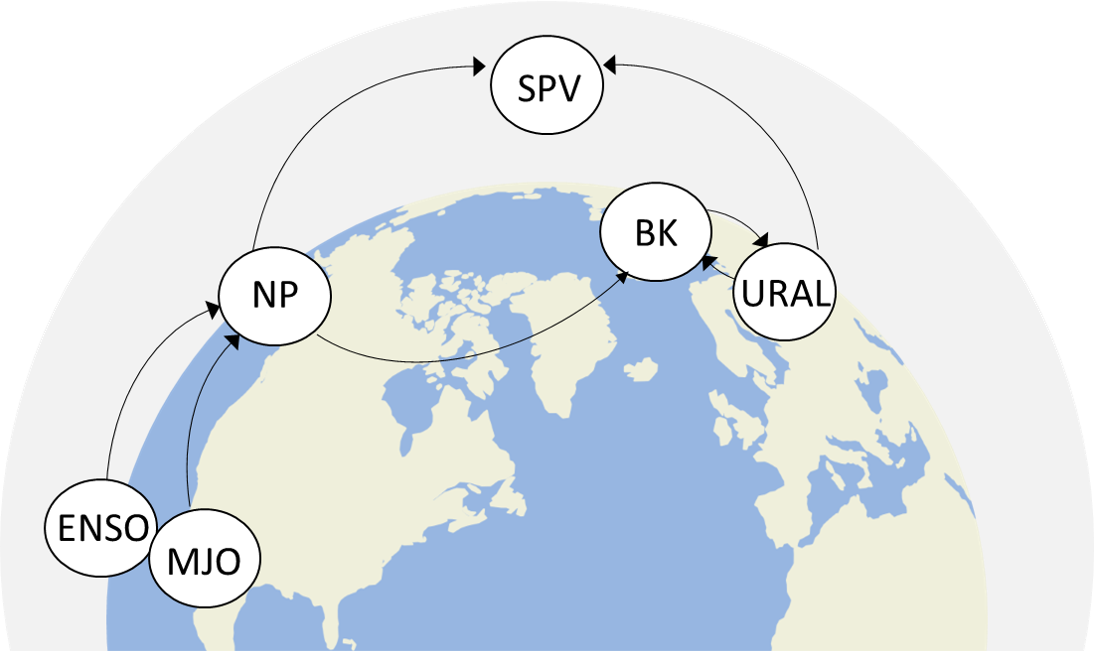

In [ ]:
# IF YOU ARE RUNNING THIS CODE LOCALLY ON YOUR MACHINE WITH JUPYTER NOTEBOOK 
#
#<img src="../images/ex4.png" width="500" height="600">

# Imports

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import statsmodels.api as sm
from scipy import signal
from scipy import stats

import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
### IF YOU ARE RUNNING THIS WITH GOOGLE COLAB
# 1. download the files in sample_data_csv/ to your Desktop
# 2. run the line of code below: it will ask you to upload the data
# 3. select the files needed for this code:
# bk_sic_ond.csv
# nh_spv_uwnd_jfm.csv
# ural_slp_ond.csv
# np_slp_ond.csv
from google.colab import files
uploaded = files.upload()

Saving bk_sic_ond.csv to bk_sic_ond.csv
Saving nh_spv_uwnd_jfm.csv to nh_spv_uwnd_jfm.csv
Saving np_slp_ond.csv to np_slp_ond.csv
Saving ural_slp_ond.csv to ural_slp_ond.csv


## Step 1) Load the data + plot time series


In [ ]:
# IF YOU ARE RUNNING THIS CODE WITH GOOGLE COLAB
bk_ts = pd.read_csv('bk_sic_ond.csv')
spv_ts = pd.read_csv('nh_spv_uwnd_jfm.csv')
ural_ts = pd.read_csv('ural_slp_ond.csv')
np_ts = pd.read_csv('np_slp_ond.csv')

In [ ]:
## IF YOU ARE RUNNING THIS CODE LOCALLY ON YOUR MACHINE WITH JUPYTER NOTEBOOK 
#bk_ts = pd.read_csv('your_path_to_sample_data_csv/bk_sic_ond.csv')
#spv_ts = pd.read_csv('your_path_to_sample_data_csv/nh_spv_uwnd_jfm.csv')
#ural_ts = pd.read_csv('your_path_to_sample_data_csv/ural_slp_ond.csv')
#np_ts = pd.read_csv('your_path_to_sample_data_csv/np_slp_ond.csv')

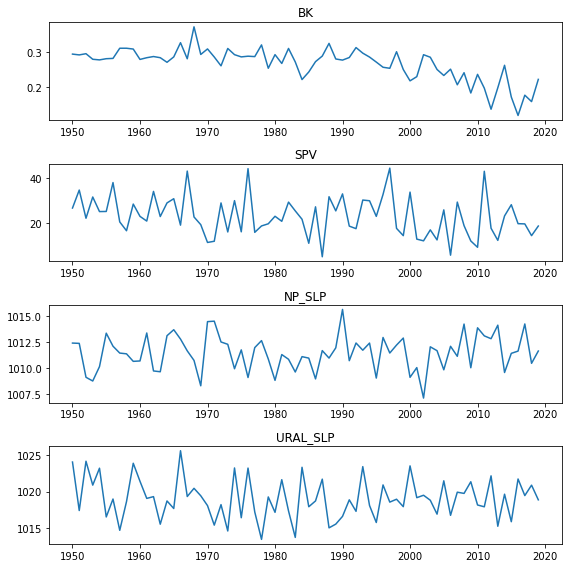

In [ ]:
fig = plt.figure(figsize=(8, 8))

plt.subplot(411)
plt.plot(bk_ts['year'],bk_ts['bk_sic'])
plt.title('BK')

plt.subplot(412)
plt.plot(spv_ts['year'],spv_ts['nh_spv_uwnd'])
plt.title('SPV')

plt.subplot(413)
plt.plot(np_ts['year'],np_ts['np_slp'])
plt.title('NP_SLP')

plt.subplot(414)
plt.plot(ural_ts['year'],ural_ts['ural_slp'])
plt.title('URAL_SLP')
plt.tight_layout()

## Step 2) Data processing


In [ ]:
years = bk_ts['year'] 
bk_data = bk_ts['bk_sic'] 
spv_data = spv_ts['nh_spv_uwnd']
np_data  = np_ts['np_slp']
ural_data = ural_ts['ural_slp']

#### Standardize the data (zero mean, unit variance)

In [ ]:
BK = (bk_data - np.mean(bk_data))/np.std(bk_data)
SPV = (spv_data - np.mean(spv_data))/np.std(spv_data)
URAL = (ural_data - np.mean(ural_data))/np.std(ural_data)
NP = (np_data - np.mean(np_data))/np.std(np_data)

#### Detrend the data (remove linear trend)

In [ ]:
BK = signal.detrend(BK)
SPV = signal.detrend(SPV)
URAL = signal.detrend(URAL)
NP = signal.detrend(NP)


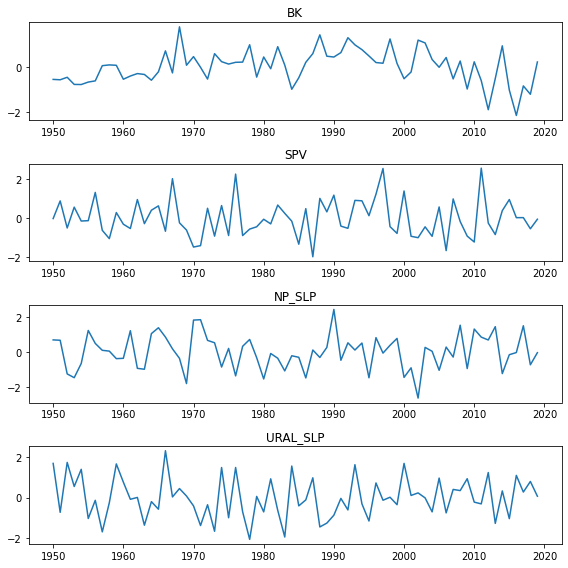

In [ ]:
fig = plt.figure(figsize=(8, 8))
#plt.suptitle("Standardised and detrended") 

plt.subplot(411)
plt.plot(years, BK)
plt.title('BK')

plt.subplot(412)
plt.plot(years, SPV)
plt.title('SPV')

plt.subplot(413)
plt.plot(years, NP)
plt.title('NP_SLP')

plt.subplot(414)
plt.plot(years, URAL)
plt.title('URAL_SLP')
plt.tight_layout()

## EXERCISE (solutions at the end of the notebook)

In [ ]:
#================================================================
# A. Determine the the causal effect of BK on SPV (via URAL)
#================================================================
# Network re-plotted below for ease of viewing


# 1. Note there one-calendar year lag between the autumn drivers BK, URAL, NP
# and the reponse variable of winter SPV ([BK[:-1], URAL[:-1], NP[:-1]] have effect on SPV[1:])
# 2. To block the confounding role of URAL without blocking its role as mediator, 
# we condition on URAL during the same autumn months as BK, assuming that its 
# mediating role involves some longer time lag. 






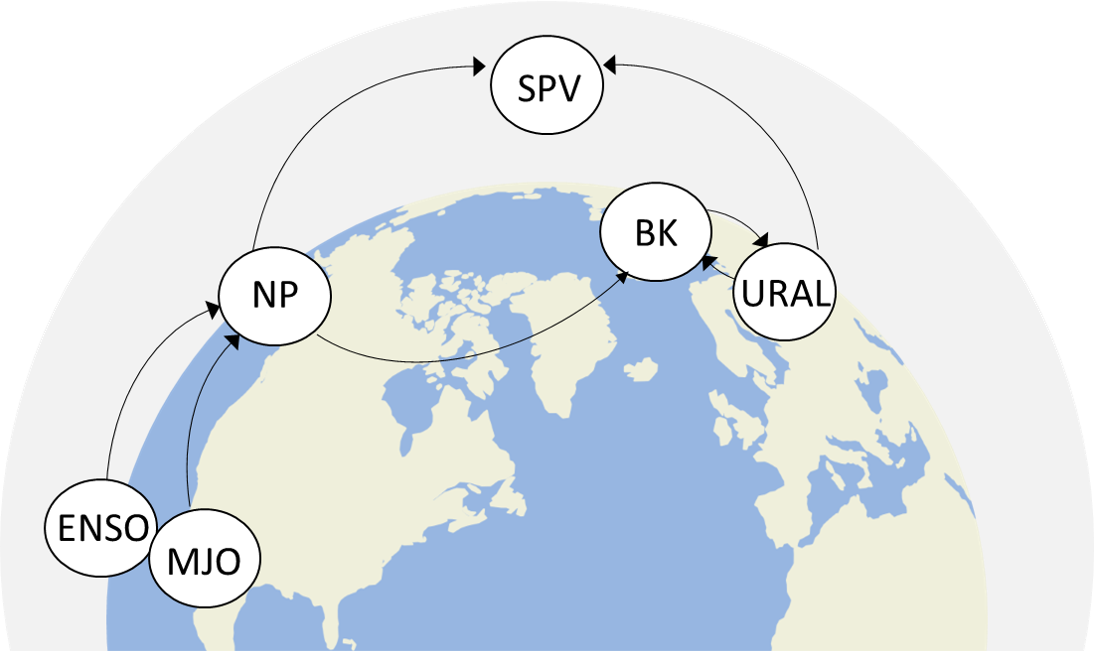

## SOLUTIONS

In [ ]:
#================================================================
# A. Determine the causal effect of BK on SPV
#================================================================

# Note the one-calendar year lag between the autumn drivers BK, URAL, NP
# and the reponse variable of winter SPV

X = np.stack([BK[:-1], URAL[:-1], NP[:-1]]).T # autmumn months of OND
Y = SPV[1: ] # winter months of JFM

model = sm.OLS(Y,X)
results = model.fit()

ce_x1 = results.params[0]
ce_x2 = results.params[1]
ce_x3 = results.params[2]

print("The causal effect of BK-SIC on SPV is (conditional on URAL , NP)", round(ce_x1,3))
print('\n')
print("The regression coeff. of URAL on SPV is ", round(ce_x2,3))
print("The regression coeff. of NP on SPV is ", round(ce_x3,3))

print('\n \n')
print("Importantly, the regression coefficients of NP (b = 0.27) and URAL (c = 0.00)")
print("cannot be interpreted as their causal effects on SPV. Instead, their causal effects would")
print("have to be estimated in different (appropriate) regression models, ")
print("which would follow from the network structure. ")

The causal effect of BK-SIC on SPV is (cond on URAL , NP) 0.213


The regression coeff. of URAL on SPV is  -0.0
The regression coeff. of NP on SPV is  0.268

 

Importantly, the regression coefficients of NP (b = 0.27) and URAL (c = 0.00)
cannot be interpreted as their causal effects on SPV. Instead, their causal effects would
have to be estimated in different (appropriate) regression models, 
which would follow from the network structure. 
